#Load genreID data which lists songs and their genres across 20 dimensions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
save_dir = "../webUI/static/genre"
genreData = os.path.join(save_dir, "genreID.csv")
genre_df = pd.read_csv(genreData)

In [4]:
genre_df.head(50)

,Id,artist_name,track_title,genre_rnb,genre_rap,genre_electronic,genre_rock,genre_newage,genre_classical,genre_reggae,...,genre_folk,genre_easylistening,genre_jazz,genre_vocal,genre_children's,genre_punk,genre_alternative,genre_spokenword,genre_pop,genre_heavymetal
0,0,Anonymous 4,Agnus dei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Drake,Find Your Love,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,Van Morrison,Hey Mr DJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Carly Rae Jepsen,Call Me Maybe,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,Justin Timberlake,4 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Avant,When It Hurts,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Maria Carey,Love Takes Time,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,7,Tyga,Far Away,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,Of Mice & Men,Purified,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,Allman Brothers Band,Stand Back,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
genre_df.shape

(127173, 23)

In [6]:
genre_columns = [i for i in genre_df.columns if i.startswith("genre")]

In [7]:
genre_columns

['genre_rnb',
 'genre_rap',
 'genre_electronic',
 'genre_rock',
 'genre_newage',
 'genre_classical',
 'genre_reggae',
 'genre_blues',
 'genre_country',
 'genre_world',
 'genre_folk',
 'genre_easylistening',
 'genre_jazz',
 'genre_vocal',
 "genre_children's",
 'genre_punk',
 'genre_alternative',
 'genre_spokenword',
 'genre_pop',
 'genre_heavymetal']

Plot number of songs in each genre

<Axes: >

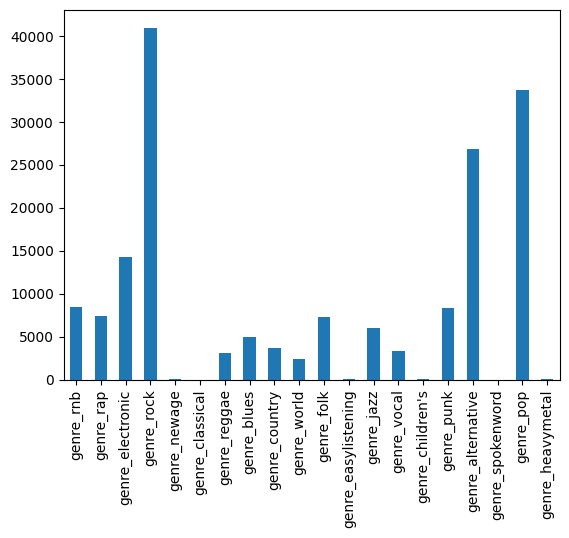

In [8]:
#Plot number of songs in each genre
genre_df[genre_columns].sum().plot(kind="bar")

In [9]:
# Get the numpy matrix for rows corresponding to genres
genre_matrix = genre_df[genre_columns].to_numpy()

In [10]:
genre_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
genre_matrix.shape

(127173, 20)

In [12]:
# Normalize the genre_matrix by dividing each row by the l2 norm of the row
g_norm = np.linalg.norm(genre_matrix, axis=1)

In [13]:
g_norm[:10]

array([0.        , 1.73205081, 0.        , 1.73205081, 0.        ,
       1.        , 2.        , 0.        , 1.        , 1.41421356])

In [14]:
# Find 1/norm wherever the norm value is nonzero
g_norm_inv = np.where(g_norm != 0, 1/g_norm, 0)

/var/folders/rp/7dqcnn3j5g544y4_k9clp2g40000gn/T/ipykernel_21481/3832921382.py:2: RuntimeWarning: divide by zero encountered in divide
  g_norm_inv = np.where(g_norm != 0, 1/g_norm, 0)


In [15]:
g_norm_inv[:10]

array([0.        , 0.57735027, 0.        , 0.57735027, 0.        ,
       1.        , 0.5       , 0.        , 1.        , 0.70710678])

In [16]:
norm_genre_matrix = genre_matrix * g_norm_inv[:, None]

In [17]:
norm_genre_matrix[:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.57735027, 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.57735027, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0

In [18]:
norm_genre_matrix.shape

(127173, 20)

In [21]:
# Recommend Similar songs

songIdx = 1

def recommend_songs(songIdx = 1, n_recommendations = 10, df = genre_df, norm_genre_matrix = norm_genre_matrix):
  # Print particulars of the chosen song
  print(genre_df.iloc[songIdx])

  # Find dot product of the norm_genre_matrix with the norm_genre_matrix row for songIdx
  cosine_similarity = np.matmul(norm_genre_matrix, norm_genre_matrix[songIdx].T)

  # Find the indices of 10 songs that have the highest cosine similarity
  top_indices = np.argsort(cosine_similarity)[-n_recommendations-1:-1][::-1]

  #Print artist_name and track_title for songs that are similar to songIdx

  print("Here are some recommendations:")
  print(" ")
  print(df.iloc[top_indices][['artist_name', 'track_title']])

  return


In [22]:
recommend_songs(songIdx = 6, n_recommendations = 10, df = genre_df, norm_genre_matrix = norm_genre_matrix)

Id                                   6
artist_name                Maria Carey
track_title            Love Takes Time
genre_rnb                          1.0
genre_rap                          0.0
genre_electronic                   0.0
genre_rock                         0.0
genre_newage                       0.0
genre_classical                    0.0
genre_reggae                       0.0
genre_blues                        0.0
genre_country                      1.0
genre_world                        0.0
genre_folk                         0.0
genre_easylistening                0.0
genre_jazz                         0.0
genre_vocal                        1.0
genre_children's                   0.0
genre_punk                         0.0
genre_alternative                  0.0
genre_spokenword                   0.0
genre_pop                          1.0
genre_heavymetal                   0.0
Name: 6, dtype: object
Here are some recommendations:
 
           artist_name         track_title
6   